In [ ]:
# Análisis exploratorio
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Maestria/Primer Trimstre/Ciencia de datos/Actividades"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [1]:
df = pd.read_csv('prueba.csv')
df.nunique()

NameError: ignored

In [ ]:
# Rename columns
df.rename(columns={'3000': 'valor', '70': 'millas', '9':'años'}, inplace=True)

In [ ]:
df

,valor,años,millas,Promedio,Propietario
0,2700,9,99,Mala,Propietario
1,2995,8,120,Mala,Propietario
2,5500,7,56,Promedio,Intermediario
3,3988,7,50,Mala,Propietario
4,3900,7,83,Mala,Propietario
5,2800,7,106,Mala,Propietario
6,6800,6,70,Excelente,Intermediario
7,6295,6,66,Promedio,Intermediario
8,3700,6,60,Mala,Propietario
9,7450,5,55,Promedio,Intermediario


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valor,30.0,8221.9,4351.829186,2700.0,5698.75,6897.5,9690.00,19888.0
años,30.0,4.7,1.878187,1.0,3.25,4.5,6.00,9.0
millas,30.0,54.4,25.756954,9.0,38.75,55.0,65.75,120.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Promedio,30,3,Mala,15
Propietario,30,2,Propietario,17


<Axes: >

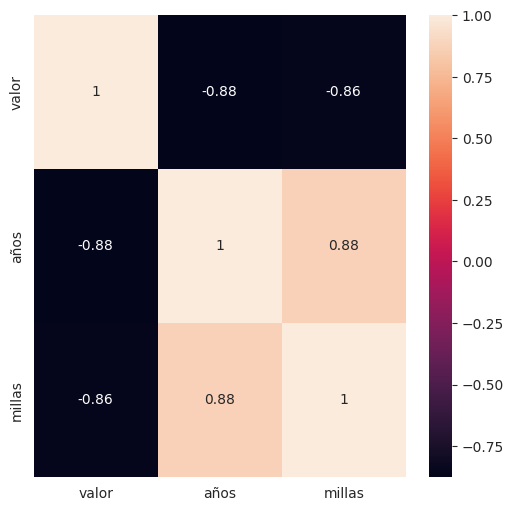

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

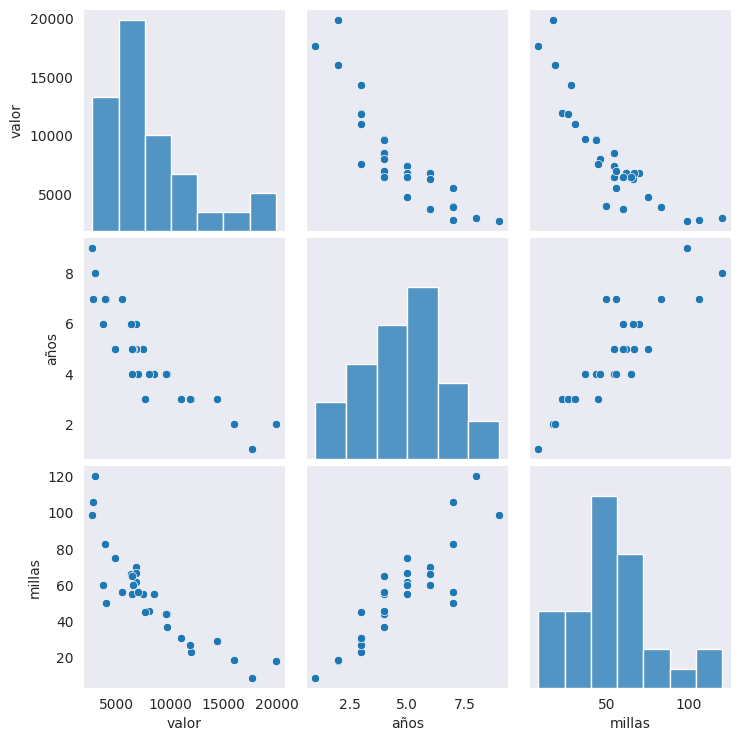

In [ ]:
sns.pairplot(data=df[['valor', 'años', 'millas']])

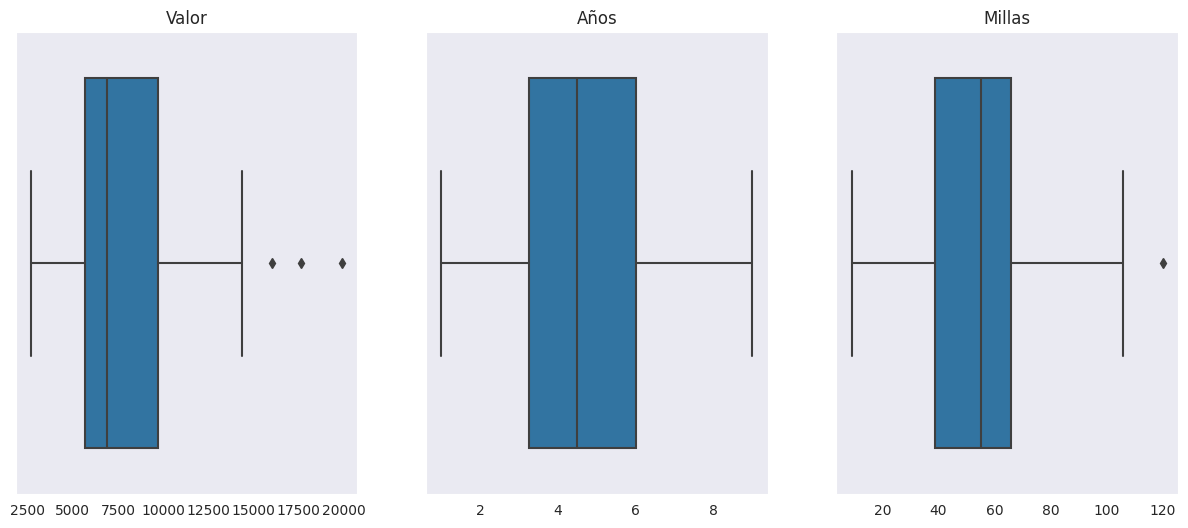

In [ ]:
# Tipo de Datos Cuantitativos
sns.set_style('dark')
fig, axes = plt.subplots(1,3, figsize=(15,6))
axes = axes.ravel()
#plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(df.select_dtypes(include=np.number).columns.tolist(), axes):
  sns.boxplot(x=df[colname],ax=ax)
  ax.set(title=f'{(colname).capitalize()}', xlabel=None)

<Axes: xlabel='Promedio', ylabel='valor'>

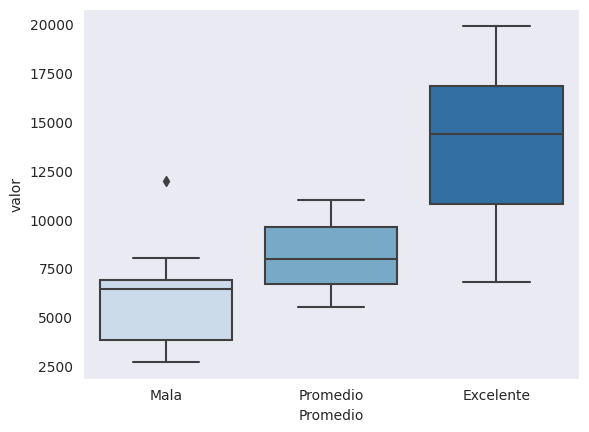

In [ ]:
sns.boxplot(data=df,x='Promedio',y='valor',palette="Blues")

In [ ]:
def diagnostic_plots(df, variable):

  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  plt.title(f"Histogram of {variable}")
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.title(f"Q-Q plot of {variable}")
  plt.show()

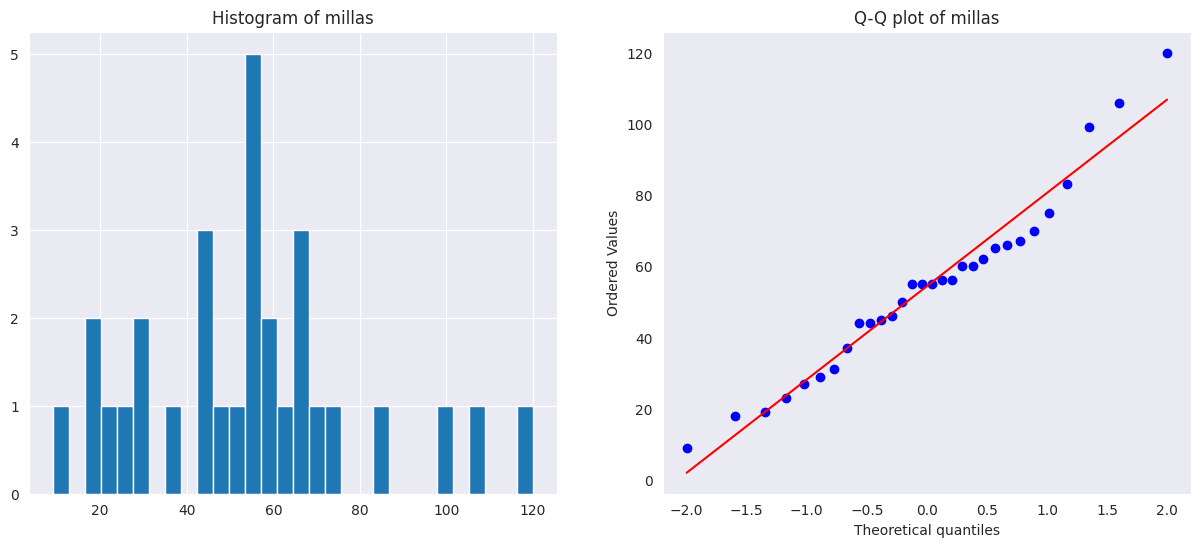

In [ ]:
diagnostic_plots(df, 'millas')

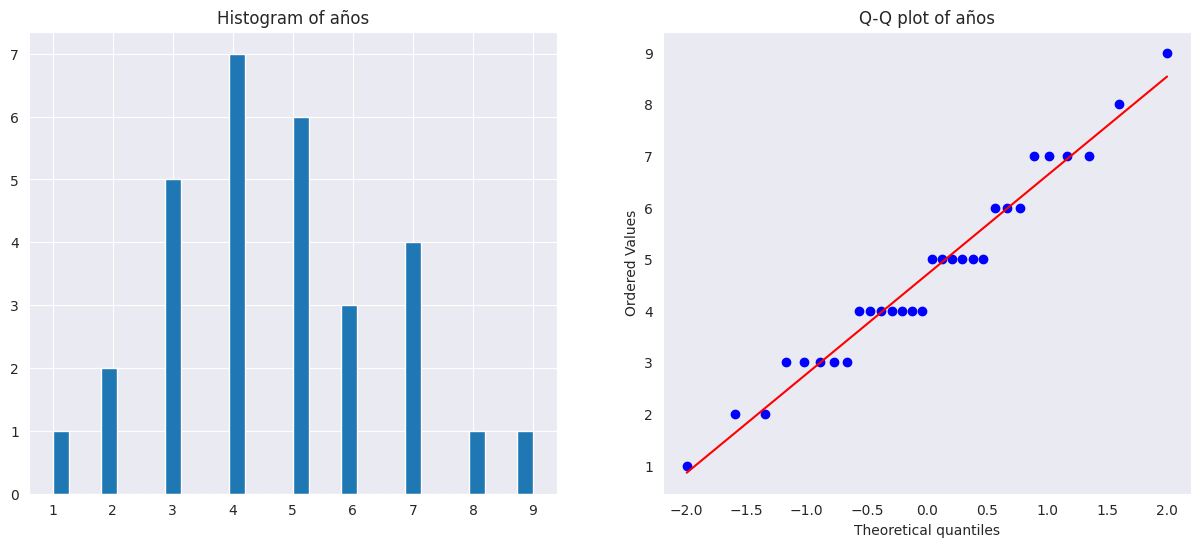

In [ ]:
diagnostic_plots(df, 'años')

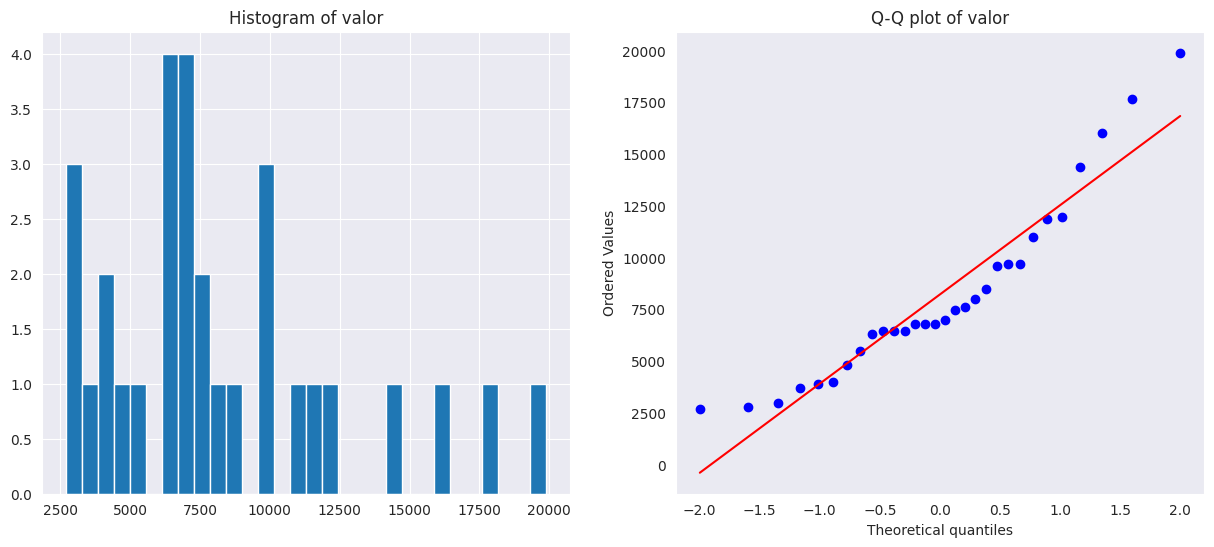

In [ ]:
diagnostic_plots(df, 'valor')

In [ ]:
X = df[['valor', 'años', 'millas']]
X

,valor,años,millas
0,2700,9,99
1,2995,8,120
2,5500,7,56
3,3988,7,50
4,3900,7,83
5,2800,7,106
6,6800,6,70
7,6295,6,66
8,3700,6,60
9,7450,5,55


In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import PowerTransformer

from feature_engine.transformation import BoxCoxTransformer

transformer = PowerTransformer(

    method="box-cox", standardize=False)

transformer.fit(X)

PowerTransformer(method='box-cox', standardize=False)

In [ ]:
X_tf = transformer.transform(X)
variables = list(X.columns)
X_tf = pd.DataFrame(X_tf, columns=variables)

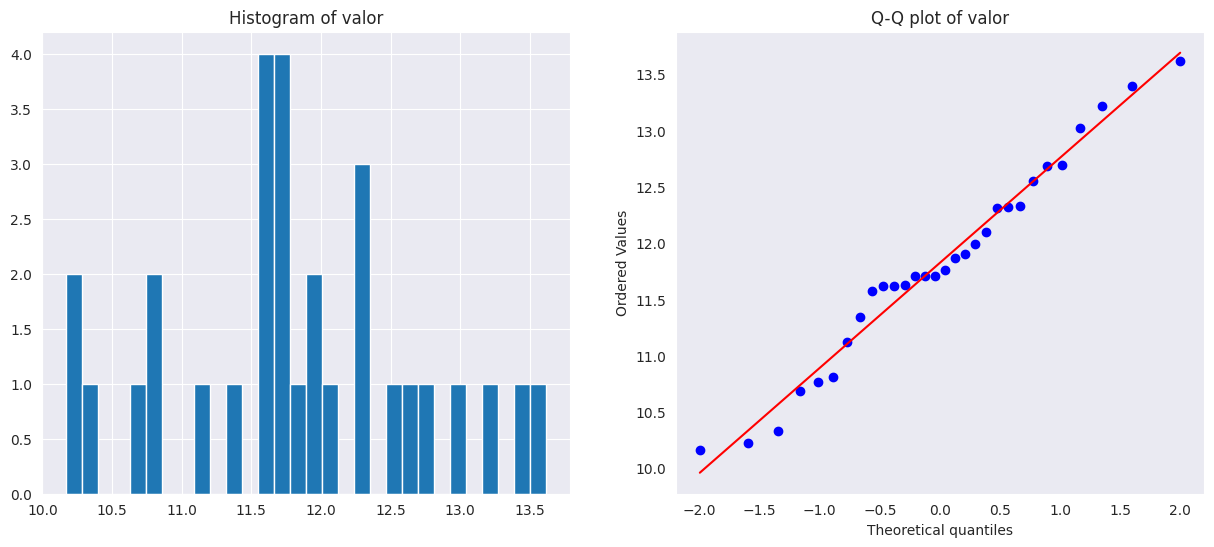

In [ ]:
diagnostic_plots(X_tf, 'valor')

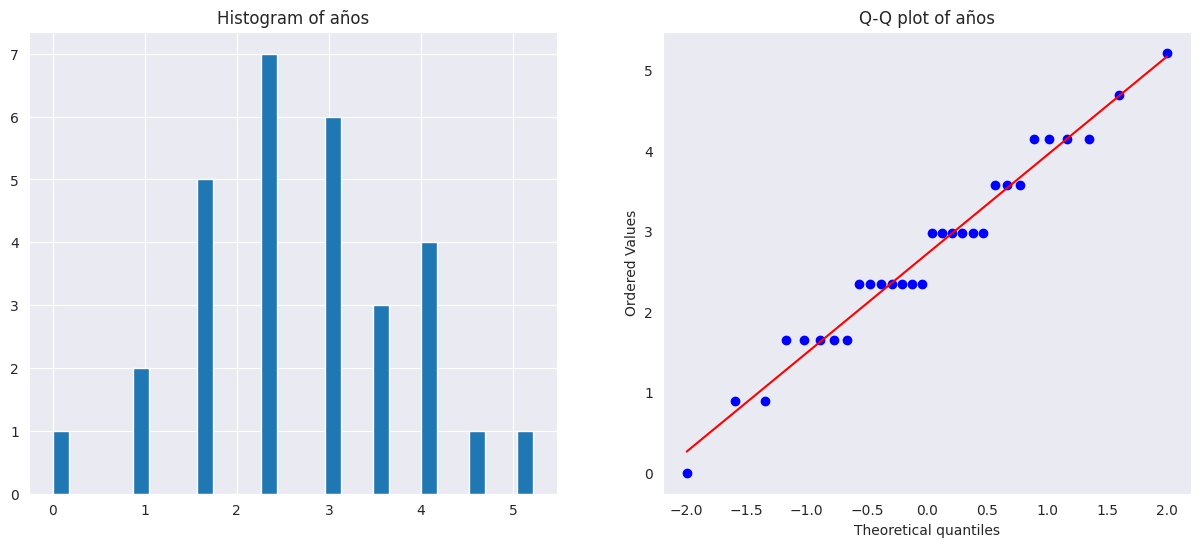

In [ ]:
diagnostic_plots(X_tf, 'años')

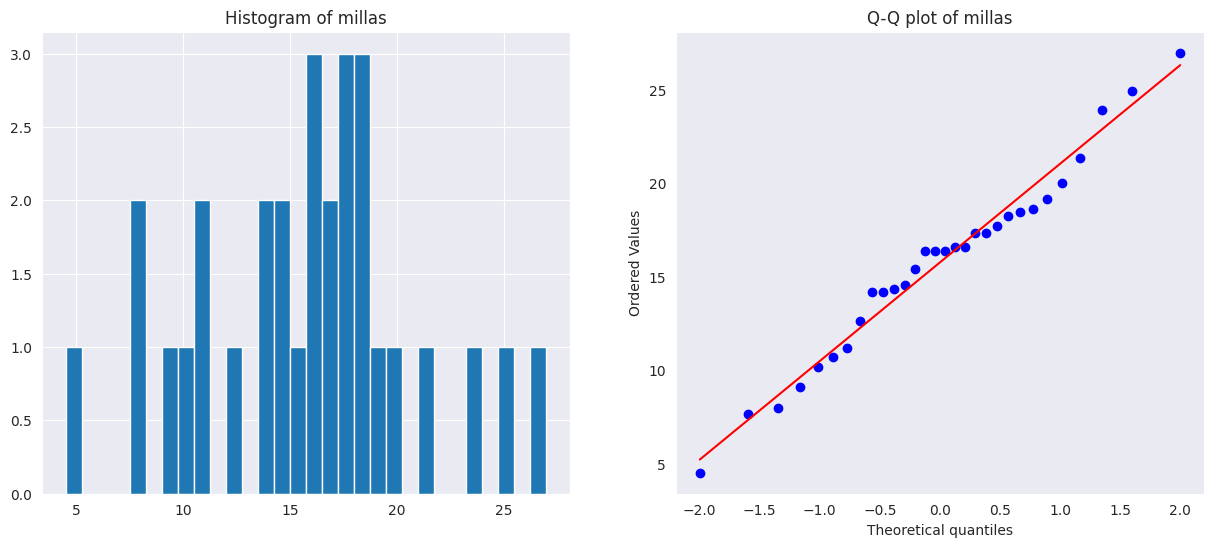

In [ ]:
diagnostic_plots(X_tf, 'millas')